![Logo Chanel](https://puls-img.chanel.com/c_limit,w_960/q_auto:good,dpr_auto,f_auto/1676976259247-8843363975198visuelboutiquedesktopsabhubjpg_900x2880.jpg)

# Projet 1 : Chanel

### Objectif : On veut prédire le prix d'un produit Chanel à Singapour à partir de ses caractéristiques (catégorie, brand, date, etc.)

In [79]:
# INSTALLATION

# !pip install pandas
# !pip install pyarrow
# !pip install fastparquet
# !pip install datasets
# !pip install scikit-learn
# !pip install matplotlib
# !pip install seaborn

## Chargement des données

In [80]:
from datasets import load_dataset
import pandas as pd

# Charger depuis Hugging Face
ds = load_dataset("DBQ/Chanel.Product.prices.Singapore", split="train")

# Convertir en DataFrame pandas
df = ds.to_pandas()


In [118]:
print(df.shape)      # dimensions (lignes, colonnes)
print(df.columns)    # liste des colonnes
print(df.head())     # aperçu
print(df.info())     # types des colonnes
print(df.describe()) # stats numériques


(970, 19)
Index(['website_name', 'country_code', 'currency_code', 'brand',
       'category1_code', 'category2_code', 'category3_code', 'product_code',
       'title', 'itemurl', 'imageurl', 'full_price', 'price', 'full_price_eur',
       'price_eur', 'flg_discount', 'year', 'month', 'day'],
      dtype='object')
  website_name country_code currency_code   brand category1_code  \
0       Chanel          SGP           SGD  CHANEL        FASHION   
1       Chanel          SGP           SGD  CHANEL        FASHION   
2       Chanel          SGP           SGD  CHANEL        FASHION   
3       Chanel          SGP           SGD  CHANEL        FASHION   
4       Chanel          SGP           SGD  CHANEL        JEWELRY   

             category2_code category3_code   product_code  \
0             READY-TO-WEAR           N.A.  PP75211V66913   
1             READY-TO-WEAR           N.A.  PP75222V67022   
2             READY-TO-WEAR           N.A.  PP75251V66859   
3             READY-TO-WEAR     

In [82]:
from IPython.display import display

# Affichage interactif du tableau
display(df.head(10))


,website_name,competence_date,country_code,currency_code,brand,category1_code,category2_code,category3_code,product_code,title,itemurl,imageurl,full_price,price,full_price_eur,price_eur,flg_discount
0,Chanel,2023-11-17,SGP,SGD,CHANEL,FASHION,READY-TO-WEAR,N.A.,PP75211V66913,Silk Crepe Black,https://www.chanel.com/sg/fashion/p/P75211V669...,https://res.cloudinary.com/dwayrkp5z/image/fet...,8110.0,8110.0,5543.40,5543.40,0
1,Chanel,2023-11-17,SGP,SGD,CHANEL,FASHION,READY-TO-WEAR,N.A.,PP75222V67022,Tweed & Imitation Pearls Black,https://www.chanel.com/sg/fashion/p/P75222V670...,https://res.cloudinary.com/dwayrkp5z/image/fet...,14940.0,14940.0,10211.89,10211.89,0
2,Chanel,2023-11-17,SGP,SGD,CHANEL,FASHION,READY-TO-WEAR,N.A.,PP75251V66859,Printed Denim Blue & White,https://www.chanel.com/sg/fashion/p/P75251V668...,https://res.cloudinary.com/dwayrkp5z/image/fet...,3150.0,3150.0,2153.11,2153.11,0
3,Chanel,2023-11-17,SGP,SGD,CHANEL,FASHION,READY-TO-WEAR,N.A.,PP75254C66790,Calfskin & Coated Lace Black,https://www.chanel.com/sg/fashion/p/P75254C667...,https://res.cloudinary.com/dwayrkp5z/image/fet...,18760.0,18760.0,12822.96,12822.96,0
4,Chanel,2023-11-17,SGP,SGD,CHANEL,JEWELRY,SOUS LE SIGNE DU LION HJ,N.A.,PJ60428,18K white gold diamonds,https://www.chanel.com/sg/fine-jewellery/p/J60...,https://res.cloudinary.com/dwayrkp5z/image/fet...,83400.0,83400.0,57006.15,57006.15,0
5,Chanel,2023-11-17,SGP,SGD,CHANEL,JEWELRY,EARRINGS,N.A.,PJ62679,18K white gold diamonds,https://www.chanel.com/sg/fine-jewellery/p/J62...,https://res.cloudinary.com/dwayrkp5z/image/fet...,75400.0,75400.0,51537.93,51537.93,0
6,Chanel,2023-11-17,SGP,SGD,CHANEL,JEWELRY,L'ESPRIT DU LION,N.A.,PJ62826,18K white gold diamonds,https://www.chanel.com/sg/fine-jewellery/p/J62...,https://res.cloudinary.com/dwayrkp5z/image/fet...,99300.0,99300.0,67874.23,67874.23,0
7,Chanel,2023-11-17,SGP,SGD,CHANEL,FRAGRANCE,MEN,N.A.,PP102440,LES EAUX DE CHANEL – EAU DE TOILETTE SPRAY,https://www.chanel.com/sg/fragrance/p/102440/p...,https://res.cloudinary.com/dwayrkp5z/image/fet...,226.0,226.0,154.47,154.47,0
8,Chanel,2023-11-17,SGP,SGD,CHANEL,FRAGRANCE,MEN,N.A.,PP107120,PARFUM TWIST AND SPRAY,https://www.chanel.com/sg/fragrance/p/107120/b...,https://res.cloudinary.com/dwayrkp5z/image/fet...,210.0,210.0,143.54,143.54,0
9,Chanel,2023-11-17,SGP,SGD,CHANEL,FRAGRANCE,MEN,N.A.,PP107580,3-IN-1 MOISTURIZER,https://www.chanel.com/sg/fragrance/p/107580/b...,https://res.cloudinary.com/dwayrkp5z/image/fet...,92.0,92.0,62.88,62.88,0


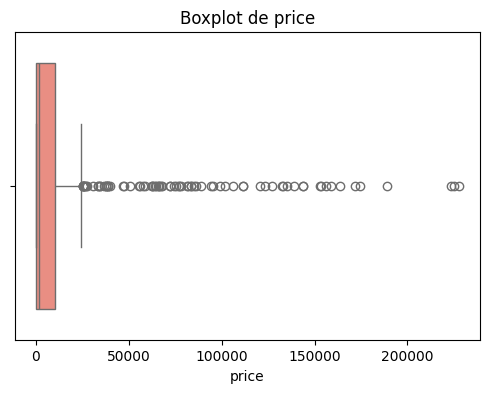

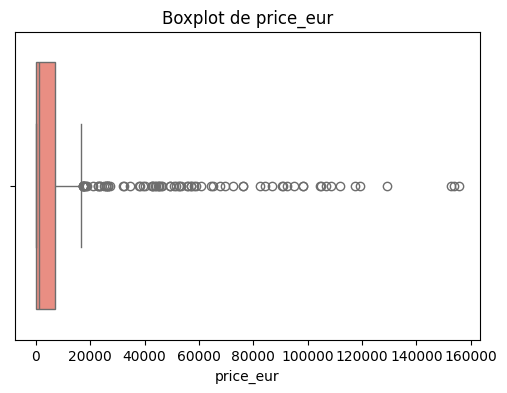

In [83]:
numeric_cols = ["price", "price_eur"] 
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color="salmon")
    plt.title(f"Boxplot de {col}")
    plt.show()


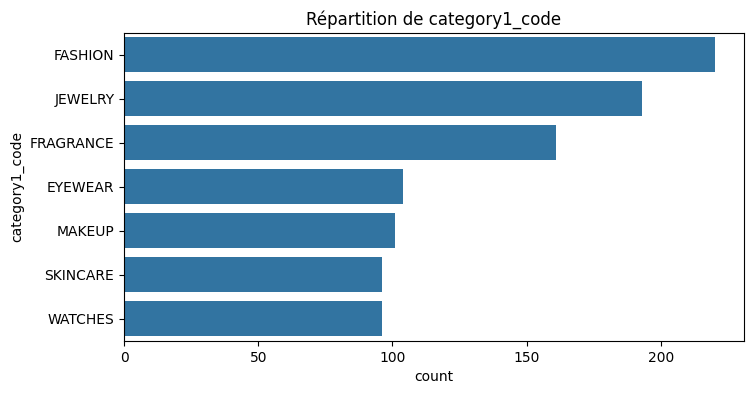

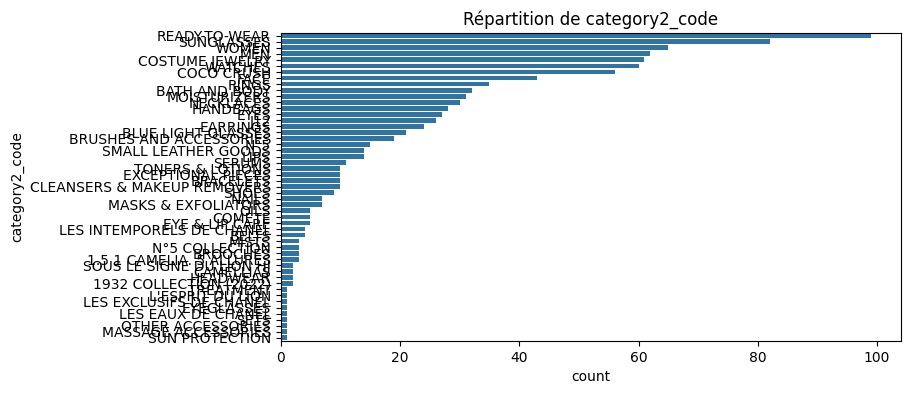

In [84]:
categorical_cols = ["category1_code", "category2_code"]
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Répartition de {col}")
    plt.show()


In [85]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10,5))
# plt.hist(df["price"], bins=50, color="skyblue", edgecolor="black")
# plt.xlabel("Prix")
# plt.ylabel("Nombre d'articles")
# plt.title("Distribution des prix des articles")
# plt.show()

# print(df["price"].describe())
# print("90e percentile:", df["price"].quantile(0.9))
# print("95e percentile:", df["price"].quantile(0.95))



In [86]:
# Par exemple, tout article au-dessus du 95e percentile
seuil_cher = df["price"].quantile(0.95)
articles_chers = df[df["price"] > seuil_cher]

import pandas as pd
pd.set_option('display.max_columns', None)  # pour voir toutes les colonnes
display(articles_chers.head(5))


,website_name,competence_date,country_code,currency_code,brand,category1_code,category2_code,category3_code,product_code,title,itemurl,imageurl,full_price,price,full_price_eur,price_eur,flg_discount
4,Chanel,2023-11-17,SGP,SGD,CHANEL,JEWELRY,SOUS LE SIGNE DU LION HJ,N.A.,PJ60428,18K white gold diamonds,https://www.chanel.com/sg/fine-jewellery/p/J60...,https://res.cloudinary.com/dwayrkp5z/image/fet...,83400.0,83400.0,57006.15,57006.15,0
5,Chanel,2023-11-17,SGP,SGD,CHANEL,JEWELRY,EARRINGS,N.A.,PJ62679,18K white gold diamonds,https://www.chanel.com/sg/fine-jewellery/p/J62...,https://res.cloudinary.com/dwayrkp5z/image/fet...,75400.0,75400.0,51537.93,51537.93,0
6,Chanel,2023-11-17,SGP,SGD,CHANEL,JEWELRY,L'ESPRIT DU LION,N.A.,PJ62826,18K white gold diamonds,https://www.chanel.com/sg/fine-jewellery/p/J62...,https://res.cloudinary.com/dwayrkp5z/image/fet...,99300.0,99300.0,67874.23,67874.23,0
90,Chanel,2023-11-17,SGP,SGD,CHANEL,JEWELRY,BRACELETS,N.A.,PJ3882,18K white gold diamonds,https://www.chanel.com/sg/fine-jewellery/p/J38...,https://res.cloudinary.com/dwayrkp5z/image/fet...,127000.0,127000.0,86807.92,86807.92,0
113,Chanel,2023-11-17,SGP,SGD,CHANEL,JEWELRY,RINGS,N.A.,PJ11935,18K white and yellow gold diamonds,https://www.chanel.com/sg/fine-jewellery/p/J11...,https://res.cloudinary.com/dwayrkp5z/image/fet...,66400.0,66400.0,45386.19,45386.19,0


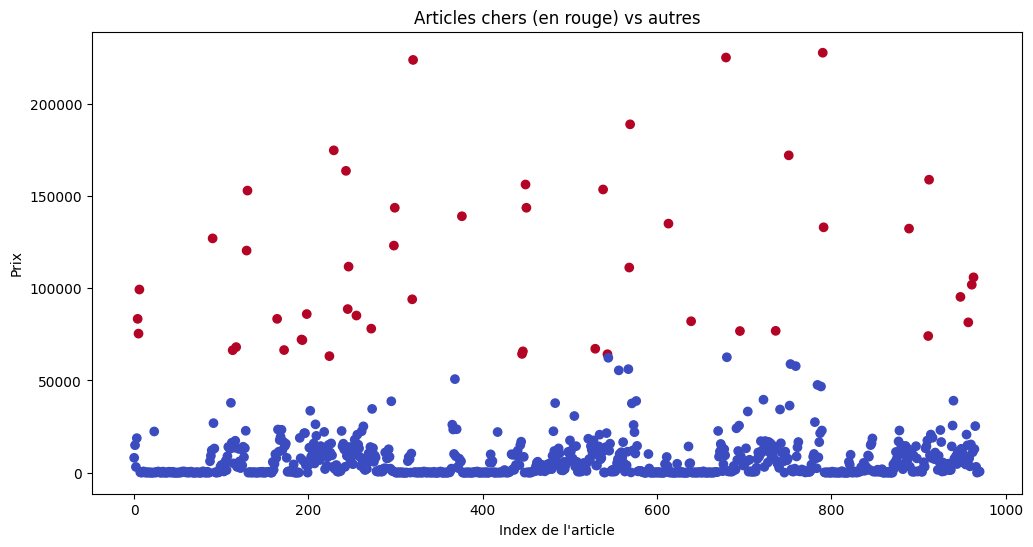

In [87]:
plt.figure(figsize=(12,6))
plt.scatter(df.index, df["price"], c=(df["price"]>seuil_cher), cmap="coolwarm")
plt.xlabel("Index de l'article")
plt.ylabel("Prix")
plt.title("Articles chers (en rouge) vs autres")
plt.show()


## 1) Pré-traitement des données

### a) Vérifier les valeurs manquantes
Fonction à utiliser : df.isnull().sum()

Objectif : identifier les colonnes avec des valeurs manquantes et décider quoi faire avec (supprimer ou imputer).

### b) Vérifier les types de données

Fonction : df.dtypes

Objectif : t’assurer que les colonnes numériques sont bien numériques et que les dates sont au format datetime.

### c) Conversion des dates (si nécessaire)

Fonction : pd.to_datetime()

Objectif : convertir la colonne des dates en datetime pour faciliter l’analyse temporelle.

### d) Encodage des variables catégorielles

Fonctions possibles : pd.get_dummies() ou sklearn.preprocessing.LabelEncoder()

Objectif : transformer les colonnes non numériques en format utilisable par les modèles ML.

### e) Normalisation / standardisation (optionnel selon le modèle)

Fonctions : sklearn.preprocessing.StandardScaler ou MinMaxScaler

Objectif : mettre les valeurs sur la même échelle pour certains modèles (régression linéaire, réseaux de neurones…).

In [88]:
# a) vérifier les valeurs manquantes

df.isnull().sum()

website_name       0
competence_date    0
country_code       0
currency_code      0
brand              0
category1_code     0
category2_code     1
category3_code     0
product_code       0
title              0
itemurl            0
imageurl           0
full_price         0
price              0
full_price_eur     0
price_eur          0
flg_discount       0
dtype: int64

résultat ? :

- Il y a une valeur manquante qui se trouve dans category2_code

Que faire ? :

- Enlever la ligne car elle est isolé. Il n'y a pas d'autre problème de ce genre.

In [89]:
# Supprimer la ligne contenant la valeur manquante
df.dropna(subset=["category2_code"], inplace=True)

# on verifie 
df.isnull().sum()


website_name       0
competence_date    0
country_code       0
currency_code      0
brand              0
category1_code     0
category2_code     0
category3_code     0
product_code       0
title              0
itemurl            0
imageurl           0
full_price         0
price              0
full_price_eur     0
price_eur          0
flg_discount       0
dtype: int64

In [90]:
# b) Vérifier les types de données

df.dtypes

website_name        object
competence_date     object
country_code        object
currency_code       object
brand               object
category1_code      object
category2_code      object
category3_code      object
product_code        object
title               object
itemurl             object
imageurl            object
full_price         float64
price              float64
full_price_eur     float64
price_eur          float64
flg_discount         int64
dtype: object

résultat ? :

presque tout nos colonnes sont de type "object" et quelque une sont en float et la dernière en int. Donc le type majoritaire est object mais c'est pas ce qu'on veut car l'objectif est de s'assurer que les colonnes numériques sont bien numériques et que les dates sont au format datetime

In [91]:
# c) Convertir
# On convertie la colonne compétence_date en datetime

df["competence_date"] = pd.to_datetime(df["competence_date"])

# après la conversion on verifie

df.dtypes

website_name               object
competence_date    datetime64[ns]
country_code               object
currency_code              object
brand                      object
category1_code             object
category2_code             object
category3_code             object
product_code               object
title                      object
itemurl                    object
imageurl                   object
full_price                float64
price                     float64
full_price_eur            float64
price_eur                 float64
flg_discount                int64
dtype: object

In [92]:
# Extraire des features de la date
df["year"] = df["competence_date"].dt.year
df["month"] = df["competence_date"].dt.month
df["day"] = df["competence_date"].dt.day

# Tu peux ensuite supprimer la colonne datetime brute
df = df.drop(columns=["competence_date"])


Puisqu'on veut faire une prediction de type regression, il faut encoder et enlever les colonnes non essentielles

In [93]:
# d) Encodage des variables catégorielles

# on va encoder
categorical_cols = ["website_name", "country_code", "currency_code", "brand", "category1_code", "category2_code", "category3_code"]

# One-hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols)

In [94]:
# on separe les features et les targets : price et price_eur
exclude_cols = ["price", "price_eur", "product_code", "title", "imageurl", "itemurl", "full_price", "full_price_eur"]

# Features 
X = df_encoded.drop(columns=exclude_cols)

# targets
y_price = df_encoded["price"]
y_price_eur = df_encoded["price_eur"]

X.dtypes


flg_discount                       int64
year                               int32
month                              int32
day                                int32
website_name_Chanel                 bool
                                   ...  
category2_code_TONERS & LOTIONS     bool
category2_code_TREATMENT            bool
category2_code_WATCHES              bool
category2_code_WOMEN                bool
category3_code_N.A.                 bool
Length: 67, dtype: object

In [95]:
# On sépare ensuite en train/test pour price
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_price, y_test_price = train_test_split(X, y_price, test_size=0.2, random_state=42)

In [96]:
# On separe ensuite en train/test pour price_eur
X_train_eur, X_test_eur, y_train_eur, y_test_eur = train_test_split(X, y_price_eur, test_size=0.2, random_state=42)

In [97]:
print("price")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train_price shape:", y_train_price.shape)
print("y_test_price shape:", y_test_price.shape)
print("-----------------")
print("price_eur")
print("y_train_eur shape:", y_train_price.shape)
print("y_test_eur shape:", y_test_price.shape)


price
X_train shape: (776, 67)
X_test shape: (194, 67)
y_train_price shape: (776,)
y_test_price shape: (194,)
-----------------
price_eur
y_train_eur shape: (776,)
y_test_eur shape: (194,)


In [98]:
# Standardization pour la regression lineaire

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# standardisation uniquement sur X
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler_eur = StandardScaler()
X_train_eur_scaled = scaler_eur.fit_transform(X_train_eur)
X_test_eur_scaled = scaler_eur.transform(X_test_eur)


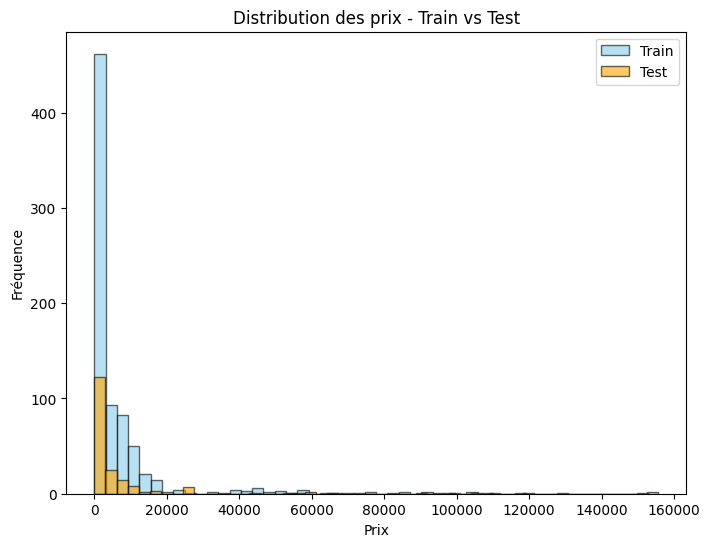

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.hist(y_train_eur, bins=50, alpha=0.6, label="Train", color="skyblue", edgecolor="black")
plt.hist(y_test_eur, bins=50, alpha=0.6, label="Test", color="orange", edgecolor="black")

plt.title("Distribution des prix - Train vs Test")
plt.xlabel("Prix")
plt.ylabel("Fréquence")
plt.legend()
plt.show()

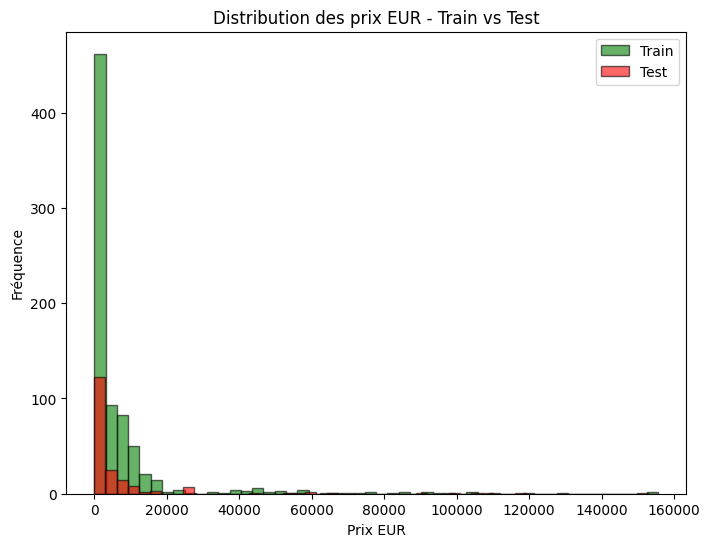

In [100]:
plt.figure(figsize=(8,6))

plt.hist(y_train_eur, bins=50, alpha=0.6, label="Train", color="green", edgecolor="black")
plt.hist(y_test_eur, bins=50, alpha=0.6, label="Test", color="red", edgecolor="black")

plt.title("Distribution des prix EUR - Train vs Test")
plt.xlabel("Prix EUR")
plt.ylabel("Fréquence")
plt.legend()
plt.show()


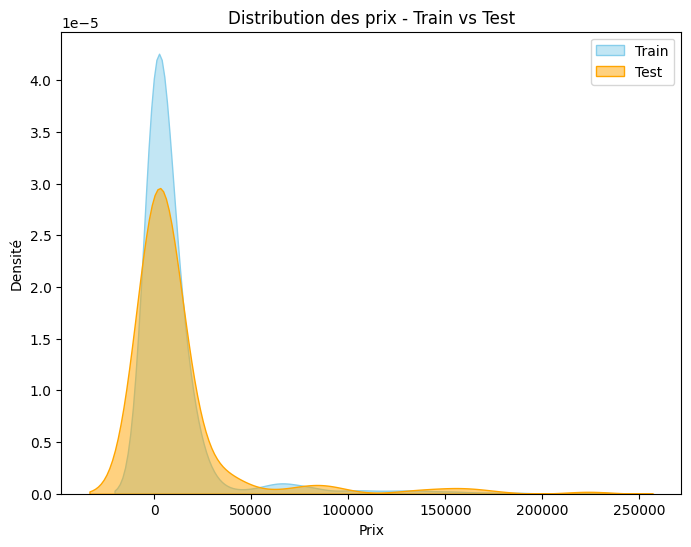

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.kdeplot(y_train_price, label="Train", fill=True, color="skyblue", alpha=0.5)
sns.kdeplot(y_test_price, label="Test", fill=True, color="orange", alpha=0.5)

plt.title("Distribution des prix - Train vs Test")
plt.xlabel("Prix")
plt.ylabel("Densité")
plt.legend()
plt.show()


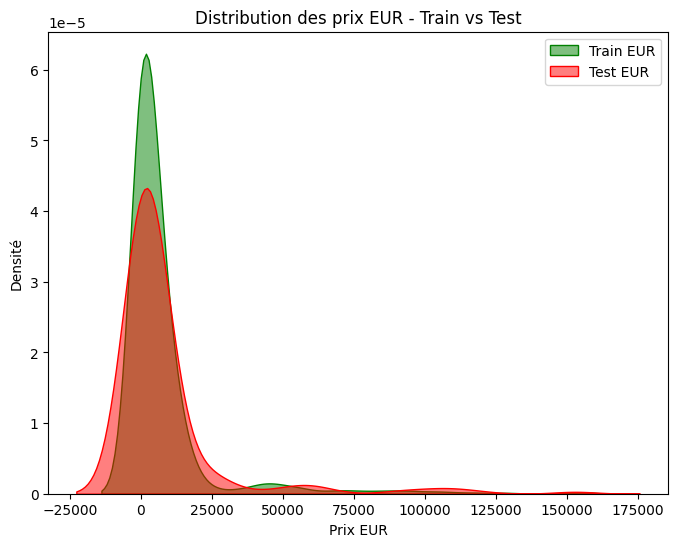

In [102]:
plt.figure(figsize=(8,6))
sns.kdeplot(y_train_eur, label="Train EUR", fill=True, color="green", alpha=0.5)
sns.kdeplot(y_test_eur, label="Test EUR", fill=True, color="red", alpha=0.5)

plt.title("Distribution des prix EUR - Train vs Test")
plt.xlabel("Prix EUR")
plt.ylabel("Densité")
plt.legend()
plt.show()


In [103]:
import pandas as pd

# Avant standardisation
print("=== Avant standardisation ===")
print(pd.DataFrame(X_train).describe())

# Après standardisation
print("\n=== Après standardisation ===")
print(pd.DataFrame(X_train_scaled).describe())

# Avant standardisation
print("=== Avant standardisation ===")
print(pd.DataFrame(X_train_eur).describe())

# Après standardisation
print("\n=== Après standardisation ===")
print(pd.DataFrame(X_train_eur_scaled).describe())


=== Avant standardisation ===
       flg_discount    year  month    day
count         776.0   776.0  776.0  776.0
mean            0.0  2023.0   11.0   17.0
std             0.0     0.0    0.0    0.0
min             0.0  2023.0   11.0   17.0
25%             0.0  2023.0   11.0   17.0
50%             0.0  2023.0   11.0   17.0
75%             0.0  2023.0   11.0   17.0
max             0.0  2023.0   11.0   17.0

=== Après standardisation ===
          0      1      2      3      4      5      6      7             8   \
count  776.0  776.0  776.0  776.0  776.0  776.0  776.0  776.0  7.760000e+02   
mean     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0 -1.144560e-18   
std      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  1.000645e+00   
min      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0 -3.553448e-01   
25%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0 -3.553448e-01   
50%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0 -3.553448e-01   
75%     

In [104]:
import pandas as pd

# Conversion en DataFrame
X_train_df = pd.DataFrame(X_train, columns=X_train.columns)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Moyenne et écart-type avant/après standardisation
stats_before = pd.DataFrame({
    "Mean (Before)": X_train_df.mean(),
    "Std (Before)": X_train_df.std()
})

stats_after = pd.DataFrame({
    "Mean (After)": X_train_scaled_df.mean(),
    "Std (After)": X_train_scaled_df.std()
})

# Fusionner et arrondir pour lisibilité
comparison = pd.concat([stats_before, stats_after], axis=1).round(2)

display(comparison)  # en Jupyter, sinon print(comparison)


,Mean (Before),Std (Before),Mean (After),Std (After)
flg_discount,0.00,0.00,0.0,0.0
year,2023.00,0.00,0.0,0.0
month,11.00,0.00,0.0,0.0
day,17.00,0.00,0.0,0.0
website_name_Chanel,1.00,0.00,0.0,0.0
...,...,...,...,...
category2_code_TONERS & LOTIONS,0.01,0.09,0.0,1.0
category2_code_TREATMENT,0.00,0.04,0.0,1.0
category2_code_WATCHES,0.07,0.25,-0.0,1.0
category2_code_WOMEN,0.06,0.24,0.0,1.0


In [105]:
import pandas as pd

# Conversion en DataFrame
X_train_eur_df = pd.DataFrame(X_train_eur, columns=X_train_eur.columns)
X_train_eur_scaled_df = pd.DataFrame(X_train_eur_scaled, columns=X_train_eur.columns)

# Moyenne et écart-type avant/après standardisation
stats_before = pd.DataFrame({
    "Mean (Before)": X_train_eur_df.mean(),
    "Std (Before)": X_train_eur_df.std()
})

stats_after = pd.DataFrame({
    "Mean (After)": X_train_eur_scaled_df.mean(),
    "Std (After)": X_train_eur_scaled_df.std()
})

# Fusionner et arrondir pour lisibilité
comparison = pd.concat([stats_before, stats_after], axis=1).round(2)

display(comparison)  # en Jupyter, sinon print(comparison)


,Mean (Before),Std (Before),Mean (After),Std (After)
flg_discount,0.00,0.00,0.0,0.0
year,2023.00,0.00,0.0,0.0
month,11.00,0.00,0.0,0.0
day,17.00,0.00,0.0,0.0
website_name_Chanel,1.00,0.00,0.0,0.0
...,...,...,...,...
category2_code_TONERS & LOTIONS,0.01,0.09,0.0,1.0
category2_code_TREATMENT,0.00,0.04,0.0,1.0
category2_code_WATCHES,0.07,0.25,-0.0,1.0
category2_code_WOMEN,0.06,0.24,0.0,1.0


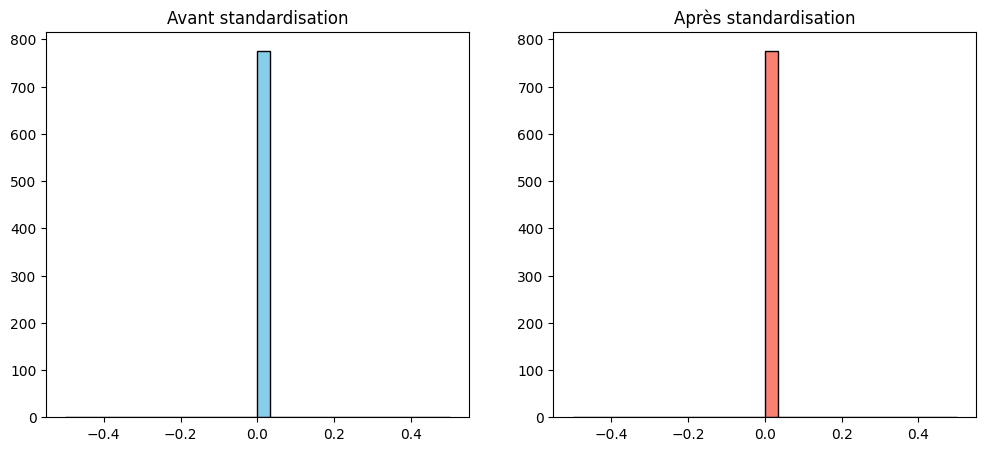

In [106]:
import matplotlib.pyplot as plt

# Exemple sur la première colonne
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(X_train.iloc[:,0], bins=30, color="skyblue", edgecolor="black")
plt.title("Avant standardisation")

plt.subplot(1,2,2)
plt.hist(X_train_scaled[:,0], bins=30, color="salmon", edgecolor="black")
plt.title("Après standardisation")

plt.show()


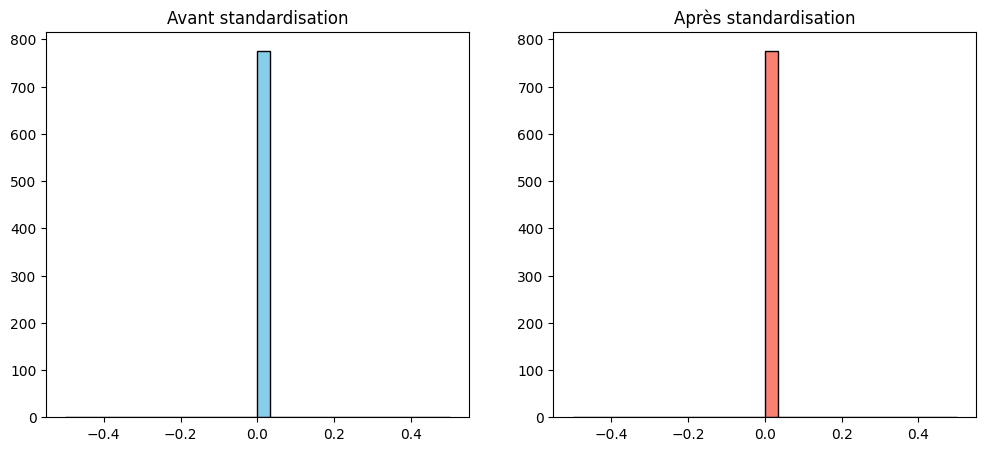

In [107]:
# Exemple sur la première colonne
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(X_train_eur.iloc[:,0], bins=30, color="skyblue", edgecolor="black")
plt.title("Avant standardisation")

plt.subplot(1,2,2)
plt.hist(X_train_eur_scaled[:,0], bins=30, color="salmon", edgecolor="black")
plt.title("Après standardisation")

plt.show()


**Pourquoi on standardise ?** 

Car on veux mettre les variables à la même échelle et c'est recommandée pour une regression linéaire pour eviter que `full_price` écrase les autres variables.

En effet, il ne faudrait pas qu'un désequilibre se pose sur des modeles sensible à l'échelle des variables.

On a finit toute la partie de pré-traitement, il est maintenant temps de passer à la modélisation entrainer et évaluer le modèle.

## 2) Modélisation

### a) Importer le modèle (Regression Lineaire)

\begin{equation}
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p
\end{equation}

où :
- $\hat{y}$ : valeur prédite par le modèle  
- $x_1, x_2, \dots, x_p$ : variables/features  
- $\beta_1, \beta_2, \dots, \beta_p$ : coefficients appris par le modèle  
- $\beta_0$ : intercept (ordonnée à l'origine)

\begin{equation}
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2
\end{equation}

où :
- $y_i$ : valeur réelle  
- $\hat{y}_i$ : valeur prédite  
- $n$ : nombre d'observations


### b) Entrainer le modèle pour `price`
### c) Evaluer le modèle
### d) répéter pour `price_eur`
### e) Interpretation
- Si R² est proche de 1, ton modèle explique bien les prix.
- Si RMSE est faible (par rapport à l’ordre de grandeur des prix), ton modèle est précis.
- Si R² est mauvais → il faudra tester d’autres modèles (Ridge, Lasso, Random Forest Regressor, etc.).

In [108]:
# a) importer le modèle de régression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# b) on entraine le modèle pour "price"

modele_linreg = LinearRegression()
modele_linreg.fit(X_train_scaled, y_train_price)

y_pred_price = modele_linreg.predict(X_test_scaled)

In [109]:
# evaluation du modèle

import numpy as np

rmse_price = np.sqrt(mean_squared_error(y_test_price, y_pred_price))
r2_price = r2_score(y_test_price, y_pred_price)

print("=== Modèle pour PRICE ===")
print("RMSE:", rmse_price)
print("R²:", r2_price)


=== Modèle pour PRICE ===
RMSE: 23528.17941239172
R²: 0.4525448798904309


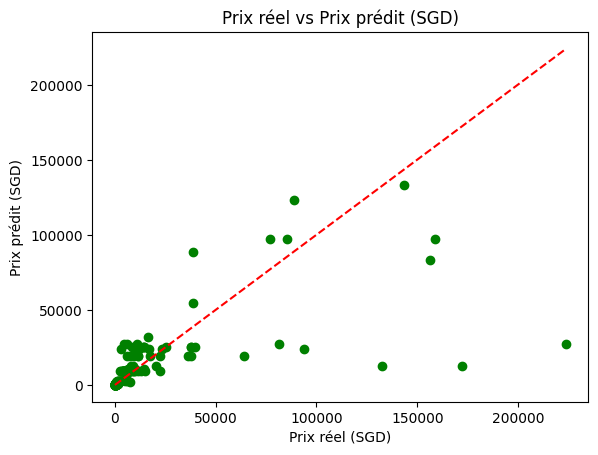

In [110]:
import matplotlib.pyplot as plt

plt.scatter(y_test_price, y_pred_price, color='green')
plt.xlabel("Prix réel (SGD)")
plt.ylabel("Prix prédit (SGD)")
plt.title("Prix réel vs Prix prédit (SGD)")
plt.plot([y_test_price.min(), y_test_price.max()],
         [y_test_price.min(), y_test_price.max()],
         'r--')  # ligne y=x
plt.show()


In [111]:
# Prédictions sur train et test
y_train_pred = modele_linreg.predict(X_train_scaled)
y_test_pred = modele_linreg.predict(X_test_scaled)

# RMSE train/test
rmse_train = np.sqrt(mean_squared_error(y_train_price, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test_price, y_test_pred))

# R² train/test
r2_train = r2_score(y_train_price, y_train_pred)
r2_test = r2_score(y_test_price, y_test_pred)

print("=== Performance sur TRAIN ===")
print("RMSE:", rmse_train)
print("R²:", r2_train)

print("\n=== Performance sur TEST ===")
print("RMSE:", rmse_test)
print("R²:", r2_test)


=== Performance sur TRAIN ===
RMSE: 14270.1401138771
R²: 0.6923830683244856

=== Performance sur TEST ===
RMSE: 23528.17941239172
R²: 0.4525448798904309


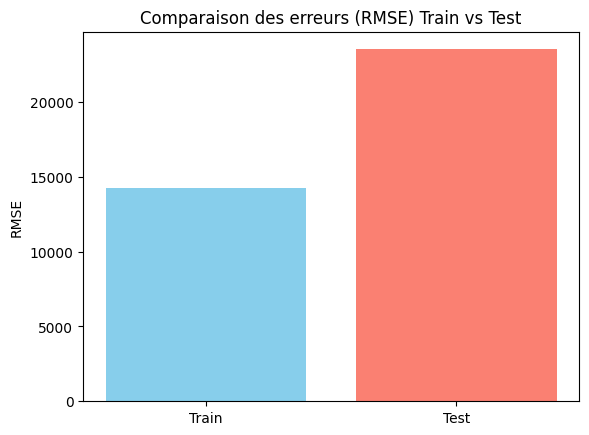

In [112]:
import matplotlib.pyplot as plt

errors = [rmse_train, rmse_test]
labels = ["Train", "Test"]

plt.bar(labels, errors, color=["skyblue", "salmon"])
plt.title("Comparaison des erreurs (RMSE) Train vs Test")
plt.ylabel("RMSE")
plt.show()


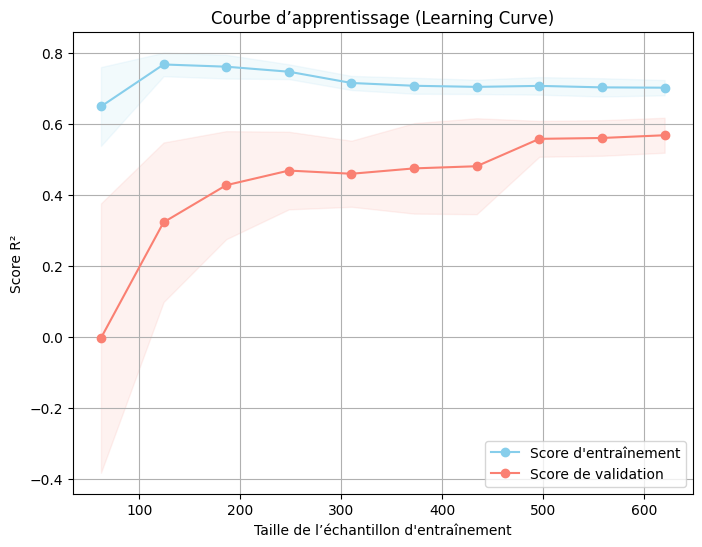

In [113]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    modele_linreg, 
    X_train_scaled, 
    y_train_price, 
    cv=5,                
    scoring="r2",   
    n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Moyenne et écart-type des scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracé de la courbe
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="skyblue", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="salmon", label="Score de validation")

# zones d’incertitude (écart-type)
plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="skyblue")
plt.fill_between(train_sizes, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="salmon")

plt.title("Courbe d’apprentissage (Learning Curve)")
plt.xlabel("Taille de l’échantillon d'entraînement")
plt.ylabel("Score R²")
plt.legend(loc="best")
plt.grid(True)
plt.show()


### Conclusion sur la régression linéaire appliquer à la prédiction du prix

on a comme résultat :

=== Modèle pour PRICE ===
- RMSE: 23528.17941239172
- R²: 0.4525448798904309

Nous remarquons que le RMSE est de 23528;17, et le R² est de 0.45
le L'erreur moyenne des prédiction est élevée par rapport aux prix réels, et le modèle explique environ 45% de la variance du prix. Donc le modèle est limité. Utiliser la régression lineaire est probablement pas suffisante pour le problème donc il faudrait tester avec un autre modèle.

In [114]:
# d) répéter avec "price_eur"

# scaler_eur = StandardScaler()
# X_train_eur_scaled = scaler_eur.fit_transform(X_train_eur)
# X_test_eur_scaled = scaler_eur.transform(X_test_eur)

modele_linreg = LinearRegression()
modele_linreg.fit(X_train_eur_scaled, y_train_eur)

y_pred_price_eur = modele_linreg.predict(X_test_eur_scaled)

# evaluation du modèle

rmse_eur = np.sqrt(mean_squared_error(y_test_eur, y_pred_price_eur))
r2_eur = r2_score(y_test_eur, y_pred_price_eur)

print("=== Modèle pour PRICE_EUR ===")
print("RMSE:", rmse_eur)
print("R²:", r2_eur)

=== Modèle pour PRICE_EUR ===
RMSE: 16082.145526020968
R²: 0.45254489770297723


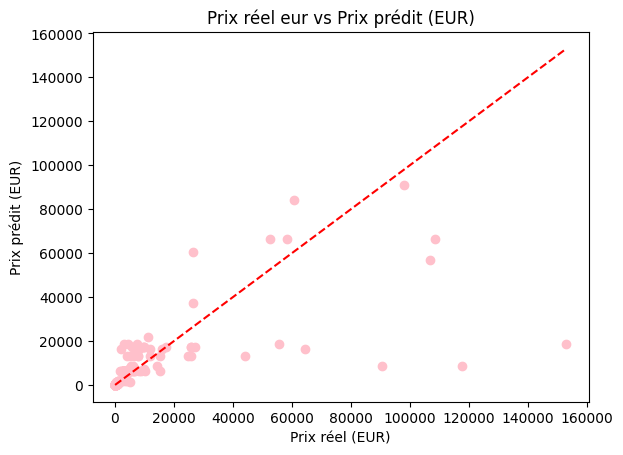

In [115]:
import matplotlib.pyplot as plt

plt.scatter(y_test_eur, y_pred_price_eur, color='pink')
plt.xlabel("Prix réel (EUR)")
plt.ylabel("Prix prédit (EUR)")
plt.title("Prix réel eur vs Prix prédit (EUR)")
plt.plot([y_test_eur.min(), y_test_eur.max()],
         [y_test_eur.min(), y_test_eur.max()],
         'r--')  # ligne y=x
plt.show()


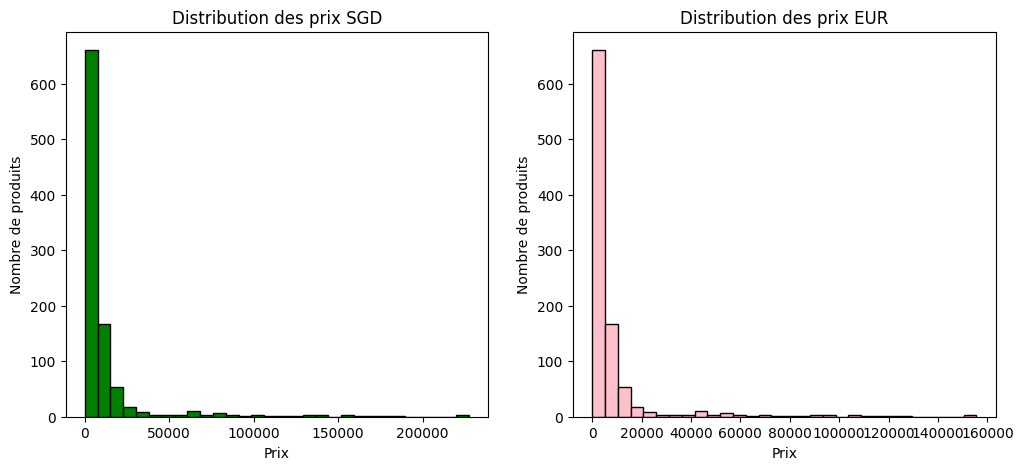

In [116]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df['price'], bins=30, color='green', edgecolor='black')
plt.title("Distribution des prix SGD")
plt.xlabel("Prix")
plt.ylabel("Nombre de produits")

plt.subplot(1,2,2)
plt.hist(df['price_eur'], bins=30, color='pink', edgecolor='black')
plt.title("Distribution des prix EUR")
plt.xlabel("Prix")
plt.ylabel("Nombre de produits")

plt.show()


<Figure size 1000x500 with 0 Axes>

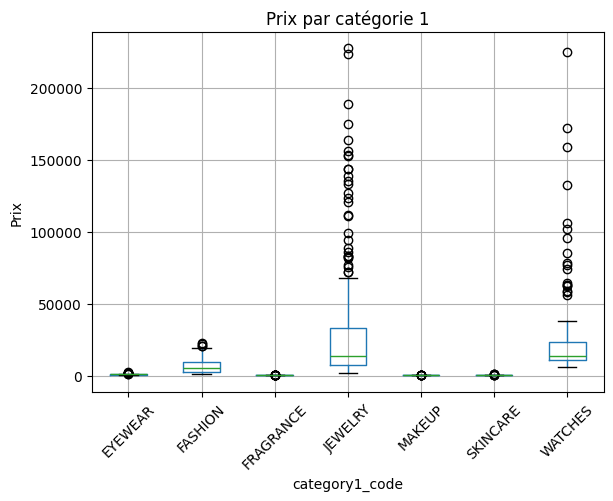

In [117]:
plt.figure(figsize=(10,5))
df.boxplot(column='price', by='category1_code', rot=45)
plt.title("Prix par catégorie 1")
plt.suptitle("")  # Supprime le titre automatique
plt.ylabel("Prix")
plt.show()


### Conclusion sur la régression linéaire appliquer à la prédiction du prix en eur

on a comme résultat :

=== Modèle pour PRICE_EUR ===
- RMSE: 16082.145526020968
- R²: 0.45254489770297723

Nous remarquons que le RMSE est de 16082.14, et le R² est de 0.45
le L'erreur moyenne des prédiction est élevée par rapport aux prix réels, et le modèle explique environ 45% de la variance du prix. Donc le modèle est limité. Utiliser la régression lineaire est probablement pas suffisante pour le problème donc il faudrait tester avec un autre modèle.

## Conclusion et observations générale sur le projet